In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install pyreadstat
# !pip install --upgrade pandas

In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
diab = datasets.load_diabetes()
X = diab.data
y = diab.target

In [3]:
# 과적합 방지 - 범용성 증가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# 학습 데이터에 대한 평가
model.score(X_train, y_train)
model.score(X_test, y_test)

0.4092596061581931

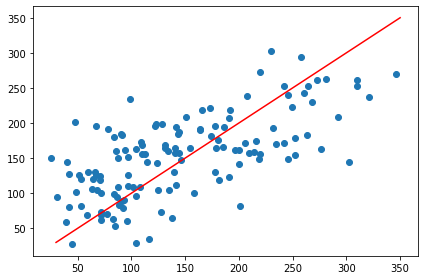

In [9]:
pred = model.predict(X_test)
exp = y_test
plt.scatter(exp, pred)
plt.plot([30,350],[30,350],'r')
plt.tight_layout()

### 표준화(표준 정규분포(평균은0,분산은1)) / 정규화(0과 1사이로 스케일링 함)
### 노이즈 데이터가 생성되거나, 과적합 될 수 있기 때문에 사용함

In [10]:
# 표준화
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [29]:
iris = load_iris()
target = iris.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
# 표준화
scaler = StandardScaler()
iris_sc = scaler.fit_transform(iris_df)
iris_df_sc = pd.DataFrame(data=iris_sc, columns=iris.feature_names)

In [22]:
# 평균은 0에 가깝게
iris_df_sc['sepal length (cm)'].mean()
# 분산은 1에 가깝게
iris_df_sc['sepal length (cm)'].var()

1.0067114093959733

In [23]:
model.score(X_train,y_train)

0.5516885424640041

In [ ]:
# 정규화 - 0과 1사이에 데이터 분포
from sklearn.preprocessing import MinMaxScaler
scal_mx = MinMaxScaler()
iris_sc_mx = scal_mx.fit_transform(iris_df)
iris_sc_mx

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris_sc_mx,target,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# 학습 데이터에 대한 평가
model.score(X_train, y_train)

0.9294742441923431

In [33]:
model.score(X_test, y_test)

0.9309487791424919

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred

array([ 1.25095944e+00,  1.94175305e+00,  1.69927224e+00, -2.22841030e-01,
       -1.16245262e-01,  9.63965098e-01, -8.18988117e-02,  2.08700435e+00,
        1.97159283e+00,  8.07905872e-02, -1.00652652e-01,  1.19020190e+00,
        1.56446806e+00,  7.69049312e-04,  1.57809714e+00,  1.11800664e+00,
        1.45360356e+00,  2.06027288e+00,  1.67899270e-01, -1.54867517e-02,
        2.09911153e-02, -1.94933668e-02,  1.52998511e+00,  1.30688404e+00,
        1.66525206e+00,  1.03134112e+00,  1.15464764e+00, -8.33925355e-02,
        1.88483003e+00,  1.89976420e+00,  1.82769173e+00,  1.97593637e+00,
       -1.66542031e-02,  9.73728548e-03,  4.14421655e-02,  1.64795160e+00,
       -5.70010469e-02,  1.59072191e+00,  1.72912573e+00,  1.22589264e+00,
       -6.86214993e-02,  2.11852059e+00,  9.20307600e-01,  1.24112453e+00,
        1.27649490e+00])

In [ ]:
res = pd.DataFrame({'y_label':y_test, 'y_pred':y_pred})
res

In [39]:
mean_squared_error(y_test,y_pred)

0.05060346259384794

In [40]:
r2_score(y_test,y_pred)

0.9309487791424919

In [41]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import O
from sklearn.metrics import accuracy_score

In [46]:
# 랜덤 데이터 생성
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9733333333333334

### confusion matrix
### TN: 예측값을 Negative(0)으로 예측했고, 실제 Negative
### FP: 예측값을 Positive(1)로 예측했는데, 실제 Negative
### FN: 예측값을 Negative로 예측, 실제 Positive
### TP: 예측값을 Positive로 예측, 실제 Positive
## 정밀도 : TP/(FP+TP)
## 재현율 : TP/(FN+TP)
## 정확도 : (TN+TP)/(TN+FP+FN+TP)
## F1 score: 정밀도+재현율


In [47]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, pred)
recall_score(y_test, pred)

0.9935897435897436

In [48]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.9748427672955975

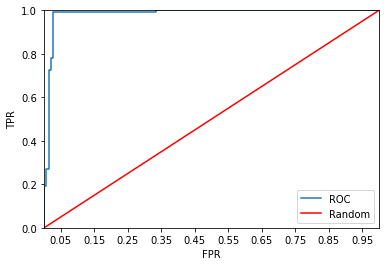

In [58]:
from sklearn.metrics import roc_curve
pred_proba_class1 = model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1],'r',label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [59]:
# 면적 구하기
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.9724893162393161